<a href="https://colab.research.google.com/github/ashikshaju999/py/blob/master/milk_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About dataset**

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.


> pH: This Column defines PH alus of the milk which ranges from 3 to 9.5 max : 6.25 to 6.90



> Temperature: This Column defines Temprature of the milk which ranges from 34'C to 90'C max : 34'C to 45.20'C

> Taste: This Column defines Taste of the milk which is categorical data 0 (Bad) or 1 (Good) max : 1 (Good)

> Odor: This Column defines Odor of the milk which is categorical data 0 (Bad) or 1 (Good) max : 0 (Bad)

> Fat: This Column defines amount of Fat in the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)

> Turbidity: This Column defines Turbidity of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)

> Colour: This Column defines Colour of the milk which ranges from 240 to 255 max : 255

> Grade: This Column defines Grade (Target) of the milk which is categorical data Where Low (Bad) or Medium (Moderate) High


# Milk Quality Prediction

Target

1-Low (Bad)

2-Medium (Moderate)

0-High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.

## Imports

In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [2]:
df = pd.read_csv('/content/milknew.csv')

In [3]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


## Data pre-processing and EDA

In [4]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
df.shape

(1059, 8)

In [7]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [8]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

**Exploratory data analysis (EDA)**

Text(0.5, 1.0, 'Grade v/s colour')

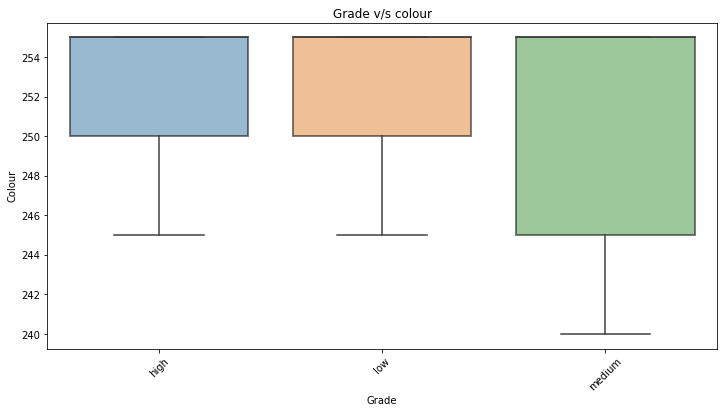

In [9]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Colour', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s colour')

Text(0.5, 1.0, 'Grade v/s Turbidity')

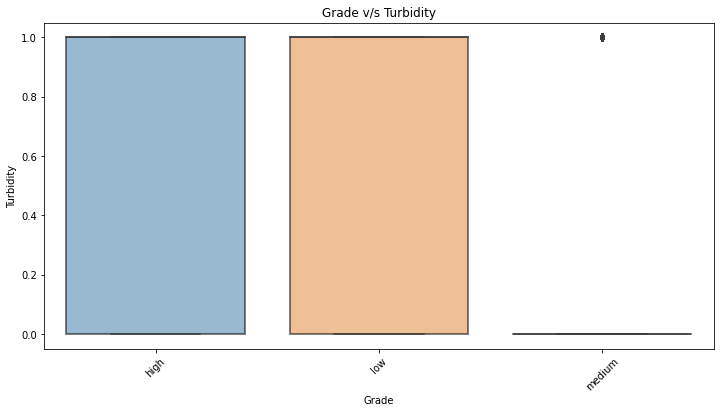

In [10]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Turbidity', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s Turbidity')

Text(0.5, 1.0, 'Grade v/s Fat ')

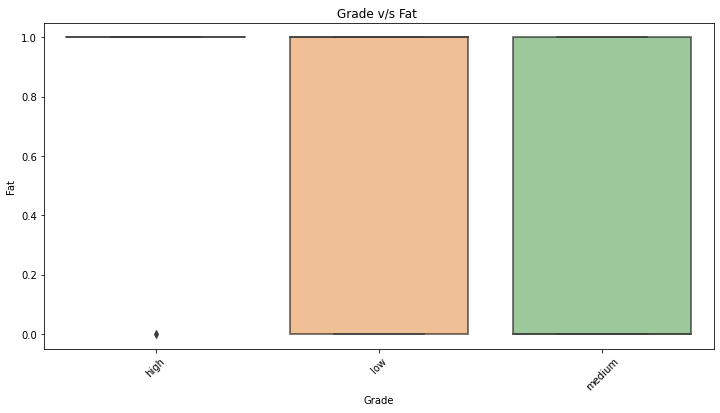

In [11]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Fat ', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s Fat ')

Text(0.5, 1.0, 'Grade v/s Odor')

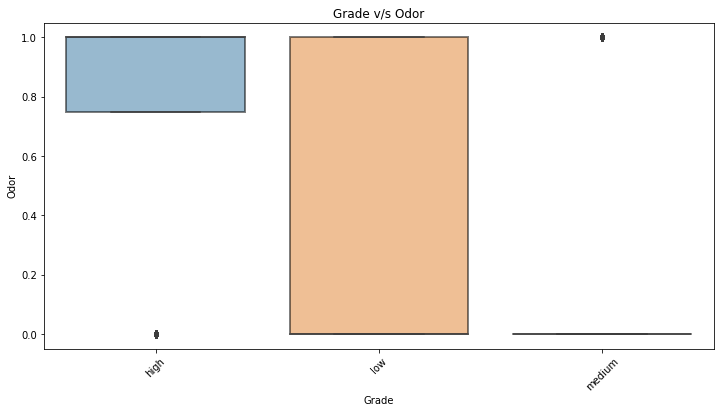

In [12]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Odor', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s Odor')

Text(0.5, 1.0, 'Grade v/s pH')

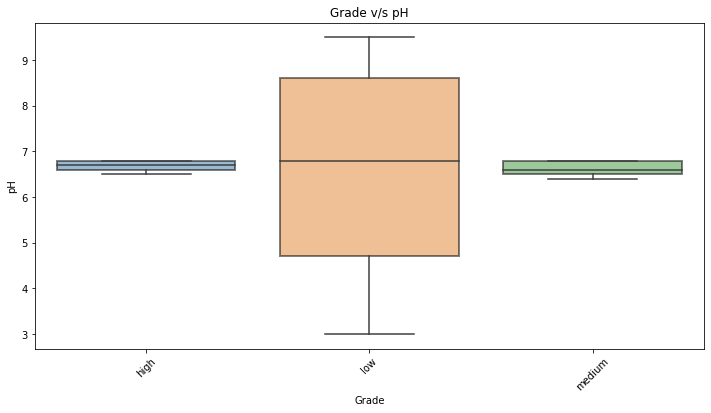

In [13]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='pH', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s pH')

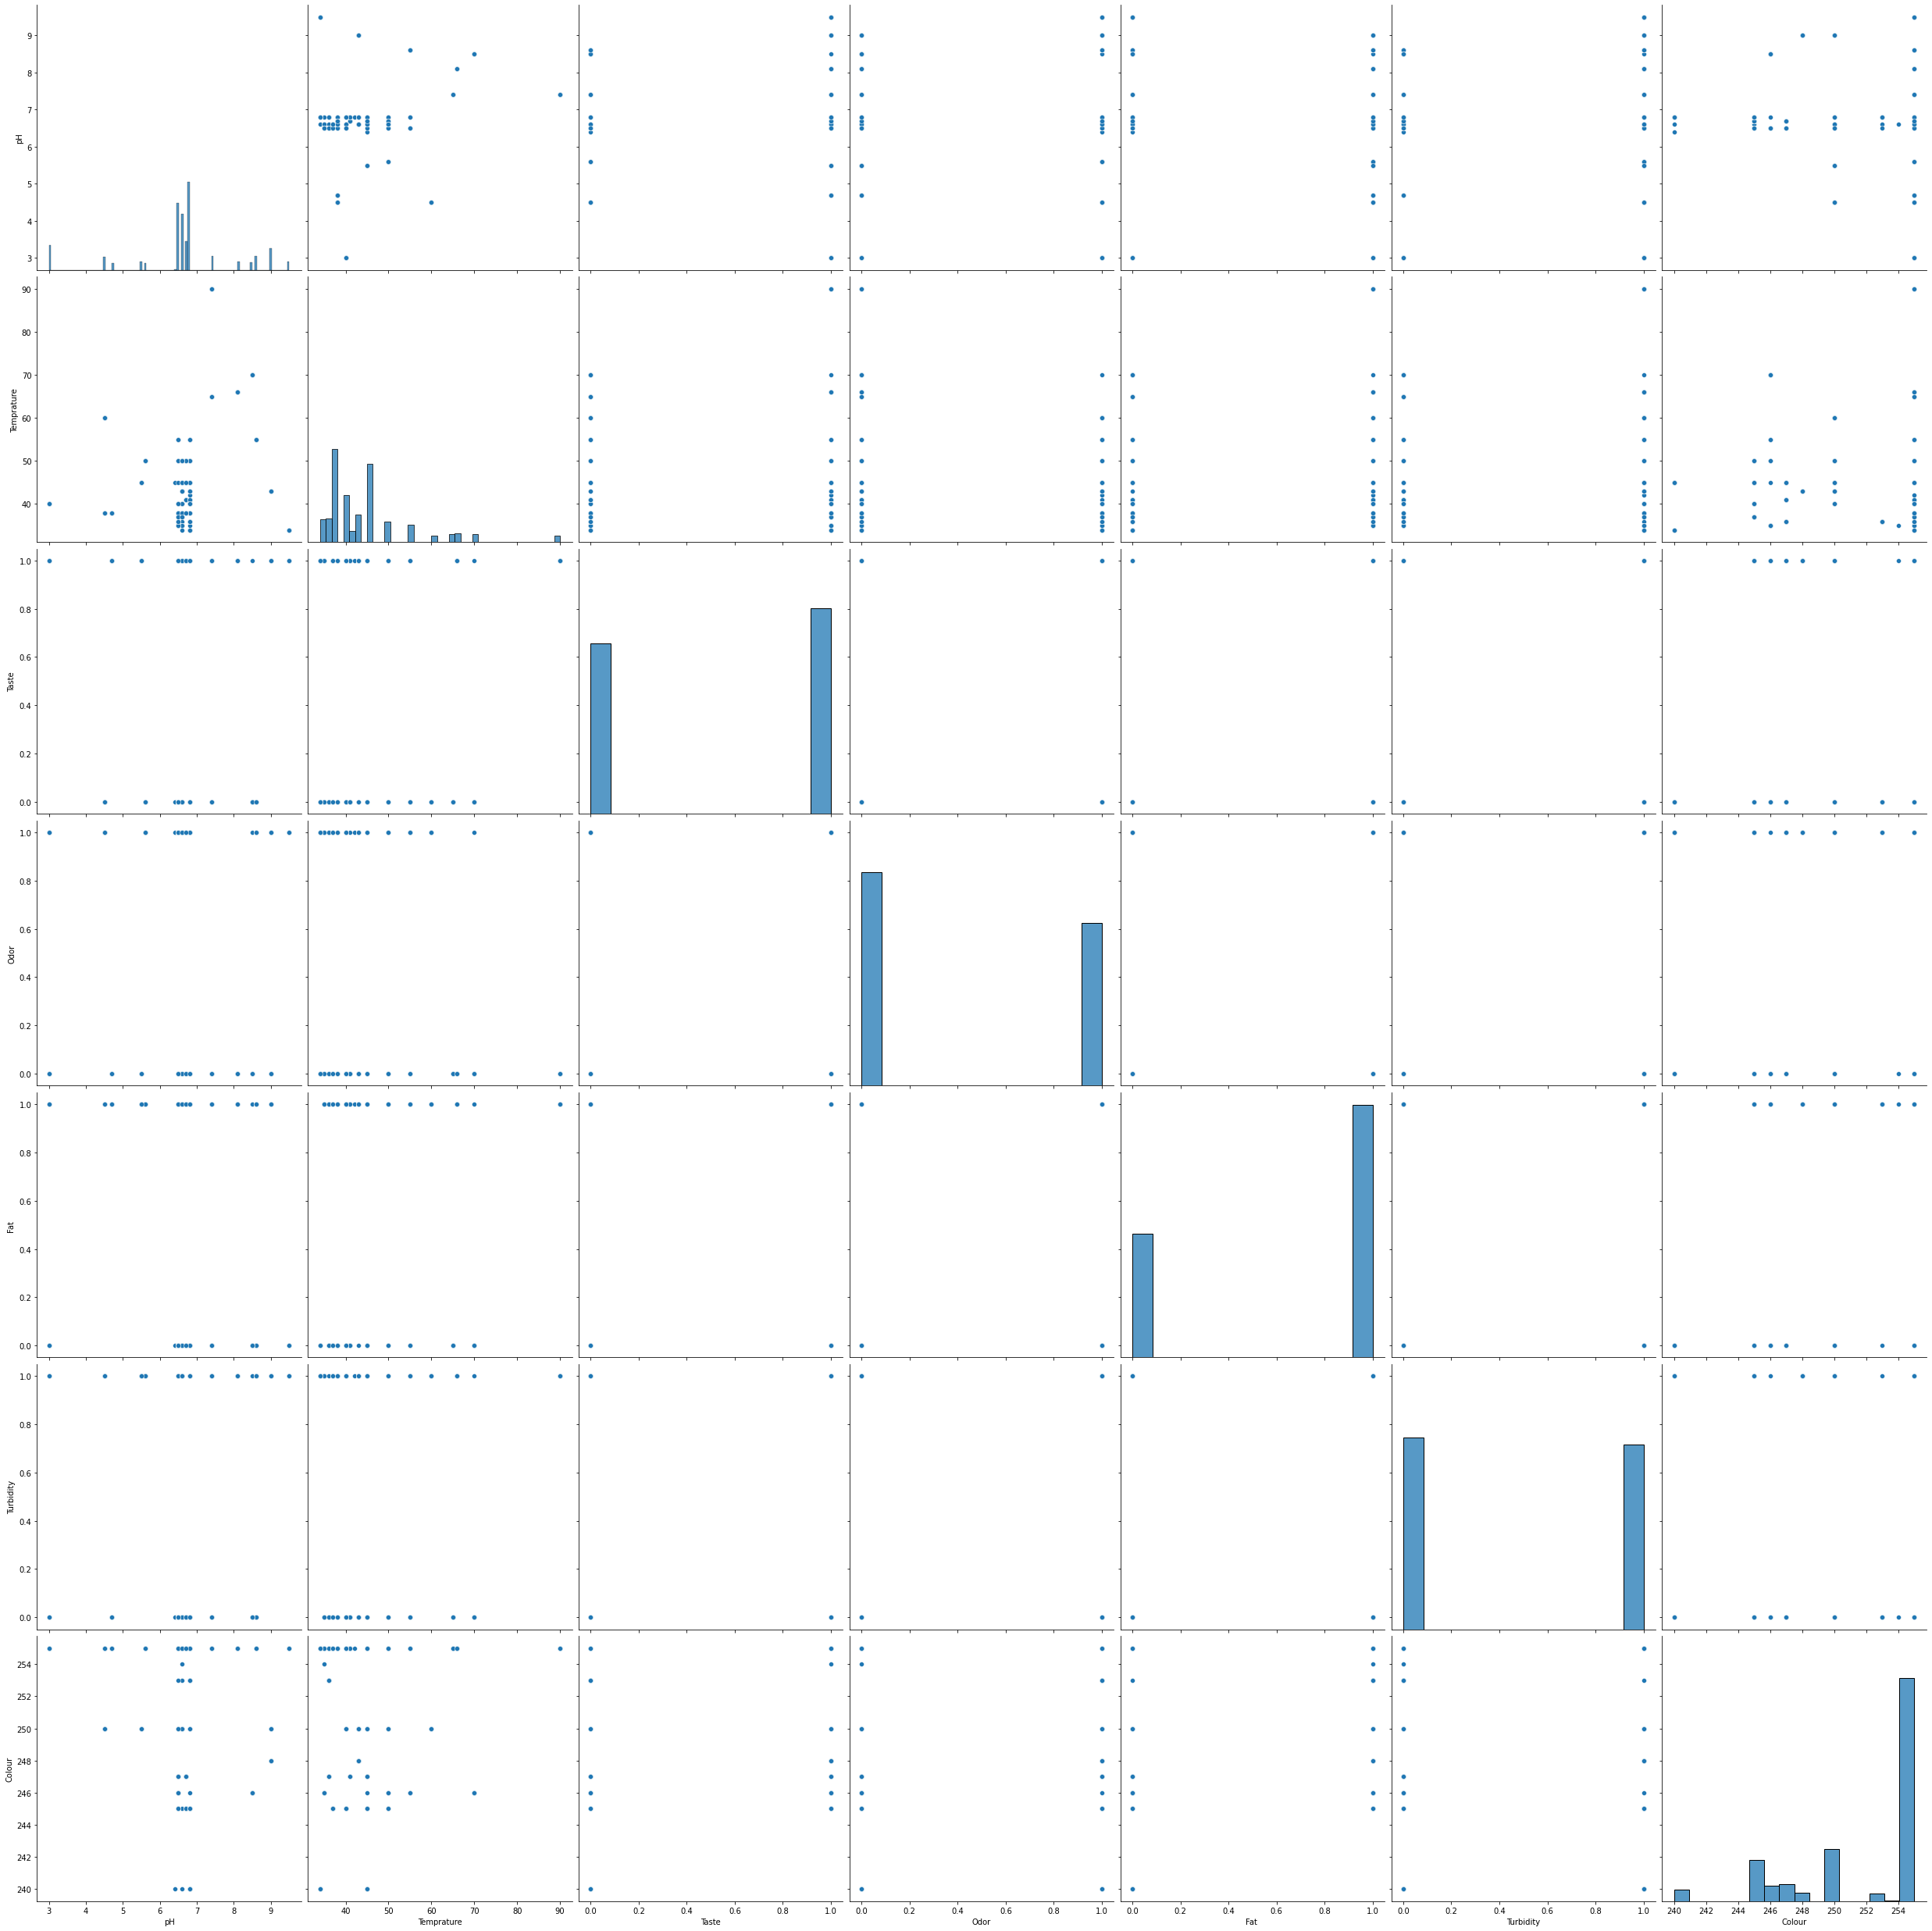

In [14]:
sns.pairplot(df,height=5)

## Preparing the data

In [15]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Grade']= label_encoder.fit_transform(df['Grade'])
  
df['Grade'].unique()

array([0, 1, 2])

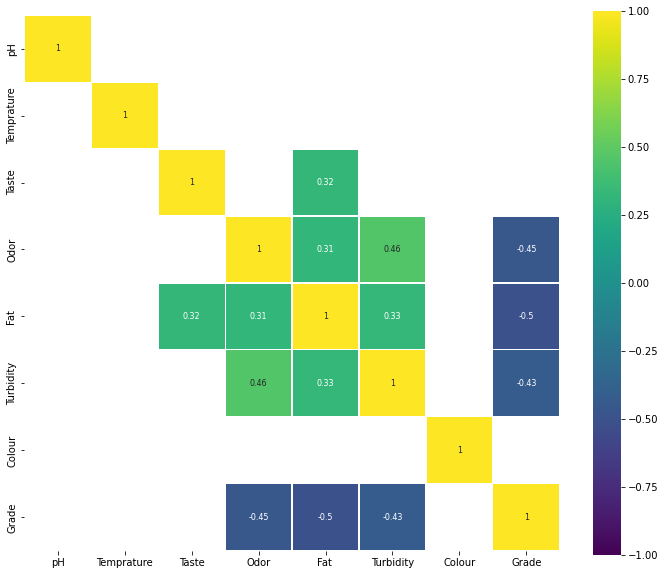

In [16]:
corr = df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

In [17]:
X = df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = df[['Grade']]

In [18]:
### Standardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(741, 7)
(741, 1)
(318, 7)
(318, 1)


# MODEL BUILDING

# Decision tree classifier 


In [19]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       1.00      0.76      0.86       115
           2       0.55      1.00      0.71       127

    accuracy                           0.67       318
   macro avg       0.52      0.59      0.52       318
weighted avg       0.58      0.67      0.59       318



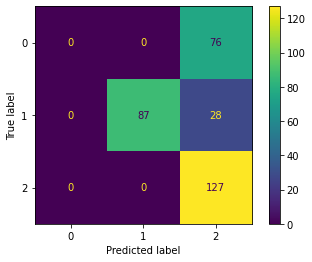

In [20]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,dtree_predictions))
print(ConfusionMatrixDisplay.from_predictions(y_test,dtree_predictions))

# SVM (Support vector machine) classifier 


In [21]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)


              precision    recall  f1-score   support

           0       0.71      0.92      0.80        76
           1       0.90      0.85      0.88       115
           2       0.95      0.83      0.89       127

    accuracy                           0.86       318
   macro avg       0.85      0.87      0.85       318
weighted avg       0.88      0.86      0.86       318



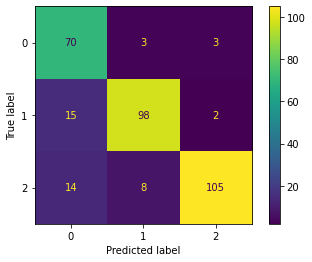

In [22]:
print(classification_report(y_test,svm_predictions))
print(ConfusionMatrixDisplay.from_predictions(y_test,svm_predictions))

# KNN (k-nearest neighbors) classifier 


In [23]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)   

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        76
           1       1.00      0.97      0.99       115
           2       0.93      1.00      0.97       127

    accuracy                           0.97       318
   macro avg       0.97      0.96      0.97       318
weighted avg       0.97      0.97      0.97       318



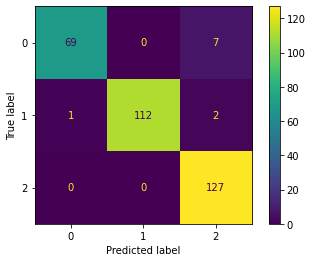

In [24]:
print(classification_report(y_test,knn_predictions))
print(ConfusionMatrixDisplay.from_predictions(y_test,knn_predictions))

# Naive Bayes classifier 


In [25]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)


              precision    recall  f1-score   support

           0       0.86      0.84      0.85        76
           1       0.94      0.94      0.94       115
           2       0.89      0.91      0.90       127

    accuracy                           0.90       318
   macro avg       0.90      0.90      0.90       318
weighted avg       0.90      0.90      0.90       318



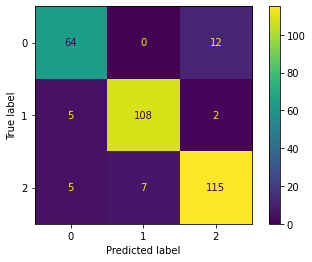

In [26]:
print(classification_report(y_test,gnb_predictions))
print(ConfusionMatrixDisplay.from_predictions(y_test,gnb_predictions))

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(SVC(gamma='auto'),X_train,y_train,cv=3)

array([0.95951417, 0.92712551, 0.93117409])

In [29]:
cross_val_score(KNeighborsClassifier(n_neighbors = 7),X_train,y_train,cv=3)

array([0.99595142, 0.94331984, 0.96761134])

In [30]:
cross_val_score(GaussianNB(),X_train,y_train,cv=3)

array([0.93927126, 0.89878543, 0.82186235])

KNeighborsClassifiers has better accuracy

In [31]:
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors = 7),X_train,y_train,cv=3)
np.average(scores1)

0.9689608636977058

In [32]:
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors = 7),X_train,y_train,cv=10)
np.average(scores1)

0.9824504504504505

In [33]:
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors = 5),X_train,y_train,cv=10)
np.average(scores1)

0.9851531531531531

In [34]:
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors = 2),X_train,y_train,cv=10)
np.average(scores1)

0.9972972972972972

**Here we used cross_val_score to fine tune our KNeighborsClassifier and got an accuracy of 99.7%**

